In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('energyConsumption.csv')
data

,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector
0,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096
1,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458
2,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159
3,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152
4,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631
5,385.648,933.663,227.897,687.473,1942.080,2641.221,1540.532,1543.553,1709.752
6,326.179,981.183,197.526,693.949,1999.819,2691.487,1583.965,1587.202,1846.331
7,338.036,1018.978,206.942,706.301,2111.198,2817.613,1646.394,1649.550,1889.873
8,361.672,956.550,210.244,651.041,2035.699,2661.997,1502.988,1505.857,1664.842
9,461.932,991.668,266.381,693.462,2232.462,2911.515,1577.804,1580.742,1638.807


In [3]:
data = data.values
y = np.zeros([data.shape[0],1])
y[:,0] = data[:, 2]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((436, 9), (109, 9), (436, 1), (109, 1))

In [5]:
newColumn = np.ones((data.shape[0],1))
data = np.append(newColumn,data, axis = 1)
data.shape

(545, 10)

In [6]:
X = np.zeros([data.shape[0],data.shape[1]-1])
X[:, 0] = data[:, 0]
X[:, 1] = data[:, 1]
X[:, 2] = data[:, 3]
X[:, 3] = data[:, 4]
X[:, 4] = data[:, 5]
X[:, 5] = data[:, 6]
X[:, 6] = data[:, 7]
X[:, 7] = data[:, 8]
X[:, 8] = data[:, 9]
thetas = np.zeros([1,X.shape[1]])
X.shape, y.shape, thetas.shape

((545, 9), (545, 1), (1, 9))

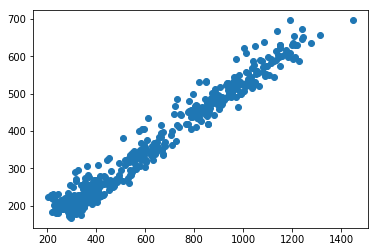

In [7]:
#Scikit learn
X_axis = data[:,1:10]
model = LinearRegression()
model.fit(X_axis,y)
pred = model.predict(X_axis)
model.coef_, model.intercept_
plt.scatter(X[:,1][np.newaxis],y)

[[0.46251607]] [70.1787545]


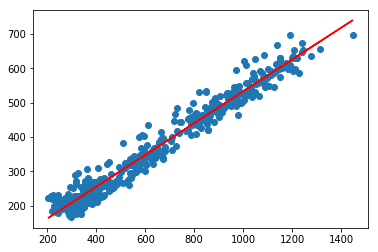

In [8]:
x_axis = X[:,1]
x_axis = x_axis[:,np.newaxis]
model = LinearRegression()
model.fit(x_axis,y)
pred = model.predict(x_axis)
print(model.coef_, model.intercept_)
plt.scatter(x_axis,y)
plt.plot(x_axis,pred, color = 'red')

In [9]:
#Cost Function
def calcVectorizedCost(X, y, theta): 
    n = y.shape[0]
    diff = (np.dot(X,theta.T)-y)
    cost = 1/(2*n) * np.sum(diff**2)
    return cost

In [10]:
calcVectorizedCost(X,y,thetas)

68667.6471191734

In [11]:
#Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    n = y.shape[0]
    for i in range (iters):
        A = np.dot(X,theta.T)
        theta = theta - alpha*(1/n)*np.dot(X.T, A - y).T
    cost = calcVectorizedCost(X, y, theta)
    return theta, cost

In [12]:
gradientDescent(X,y,thetas,0.01,0)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 68667.6471191734)

Cost after  100000  iterations:  10.037507141065907
Cost after  200000  iterations:  2.425571686160765
Cost after  300000  iterations:  0.5861436006648982
Cost after  400000  iterations:  0.1416429703383256
Cost after  500000  iterations:  0.034228707833991574
Cost after  600000  iterations:  0.00827188527230118
Cost after  700000  iterations:  0.001999378528787007
Cost after  800000  iterations:  0.0004836170199478035
Cost after  900000  iterations:  0.00011733032384627849
[[ 1.01572237e-03  4.68782054e-04  9.98612417e-01  4.29715108e-04
   9.10035841e-05 -3.51802253e-06  2.58025534e-03 -2.65537999e-03
  -1.18414897e-04]]


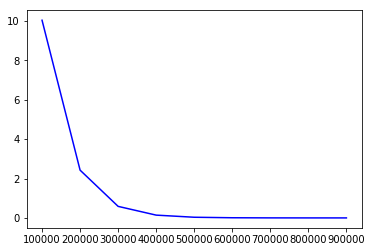

In [13]:
iterations = 1000000
x_axis = list()
y_axis = list()
for i in range (100000,iterations,100000):
    theta, cost= gradientDescent(X,y,thetas,0.00000007,i)
    print("Cost after " ,i, " iterations: " ,cost)
    x_axis.append(i)
    y_axis.append(cost)
plt.plot(x_axis,y_axis, color = 'blue')
print(theta)

In [14]:
X2 = preprocessing.normalize(X)
y2 = preprocessing.normalize(y)

Cost after  100000  iterations:  0.06976112609441763
Cost after  200000  iterations:  0.009750441044348288
Cost after  300000  iterations:  0.0013799645325989554
Cost after  400000  iterations:  0.00021237421255703592
Cost after  500000  iterations:  4.945877118257439e-05
Cost after  600000  iterations:  2.6678620228904898e-05
Cost after  700000  iterations:  2.3445934822124176e-05
Cost after  800000  iterations:  2.2940848989433894e-05
Cost after  900000  iterations:  2.2817270613006266e-05
[[1.96638991e-04 1.16506588e-01 6.71866375e-02 2.31015090e-01
  3.54158571e-01 5.17929519e-01 3.80956220e-01 3.81874971e-01
  5.08828406e-01]]


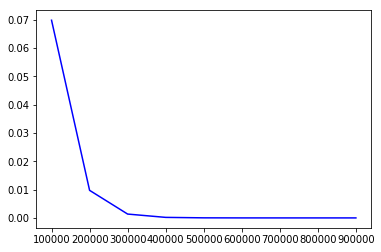

In [15]:
iterations = 1000000
thetas2 = np.zeros([1,X.shape[1]])
x_axis = list()
y_axis = list()
for i in range (100000,iterations,100000):
    theta, cost= gradientDescent(X2,y2,thetas2,0.00001,i)
    print("Cost after " ,i, " iterations: " ,cost)
    x_axis.append(i)
    y_axis.append(cost)
plt.plot(x_axis,y_axis, color = 'blue')
print(theta)


In [16]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_squared_log_error(y_test,pred))
print(model.score(X_test, y_test))

7.68737859626985e-26
1.2086217538707244e-30
1.0


In [17]:
#SVR
